In [1]:
#import seaborn
import seaborn as sns 

In [3]:
#to see visualizations in notebook
%matplotlib inline

In [4]:
#seaborn comes with its own built-in datasets
#this loads the tips dataset
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


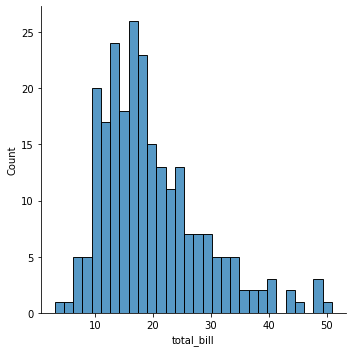

In [11]:
#Distribution Plot - shows a distribution of a variable
sns.displot(tips['total_bill'],bins=30)

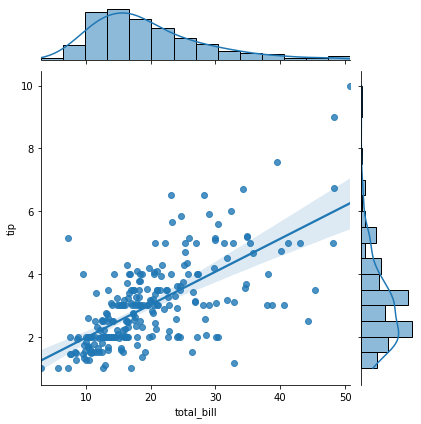

In [14]:
#joints plots - combine 2 different distribution plots
#takes a column, x and a column y and plots it against each other. Use data to specify which dataset. Kind is used to show what type of plot you want. Hex can be used
sns.jointplot(x='total_bill', y='tip', data=tips,kind='reg')

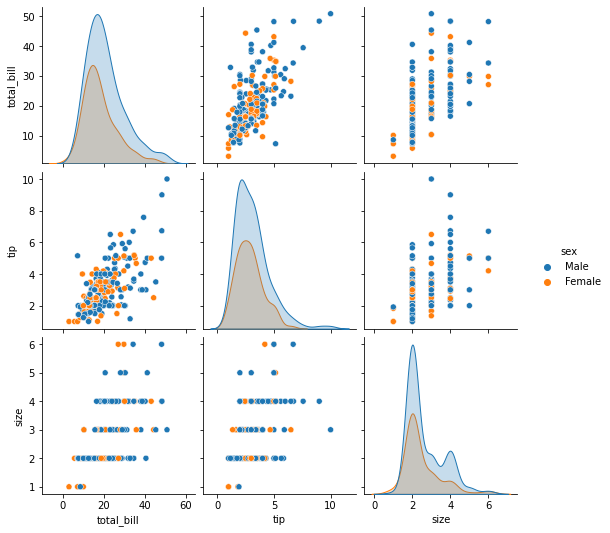

In [18]:
#pair plot - plots pairwise relationships across entire dataframe
#essentially, it does what a joint plot does, but for every combination of the numerical columns in the data frame
#great for quickly visualizing your data
#use hue to see a categorical column (non-numeric). For example, the sex column - this will color the data points based on which sex did what
#use palette to change the specific color of the paletts
sns.pairplot(tips,hue='sex')

<AxesSubplot:xlabel='total_bill'>

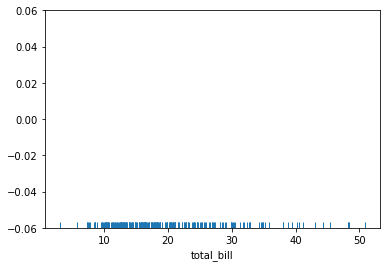

In [19]:
#Rug Plots
#draws a dash point for every point along the distribution line
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

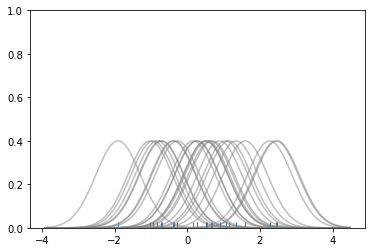

In [24]:
#what is the KDE line? Kernel Density Estimation
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 

#create dataset
dataset=np.random.randn(25)

#create another rugplot
sns.rugplot(dataset)

#set up the x-axis for the plot
x_min = dataset.min()-2
x_max = dataset.max()+2

#100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

#set up the bandwidtch
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidtch=((4*dataset.std()**5)/(3*len(dataset)))**.2

#create empty kernel list
kernel_list = []

for data_point in dataset:
    #create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidtch).pdf(x_axis)
    kernel_list.append(kernel)

    #scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey', alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basic Functions')

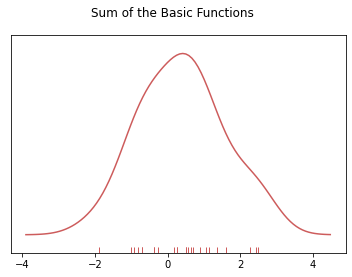

In [25]:
#The blue dashes show the data points
#The Gray lines represent the normal distributions on top of each of the blue dashes. These distributions are centered around the dash
#to get a KDE line, you sum all of the gray lines up to get a single line. To do this, do the following:

#plot the sum of the basic function
sum_of_kde = np.sum(kernel_list,axis=0)

#plot figure
fig=plt.plot(x_axis,sum_of_kde,color='indianred')

#add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

#get rid of the y-tick marks
plt.yticks([])

#set title
plt.suptitle ("Sum of the Basic Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

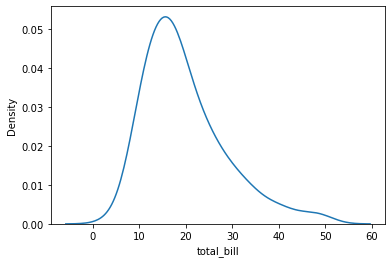

In [26]:
#if you want to plot the KDE of a column, do this:
sns.kdeplot(tips['total_bill'])